

# ce note book est dédié pour la  visualisation des donnèes , ainsi tous les informations

In [1]:
import zipfile

import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa
from multiprocessing import Pool
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras import layers, activations

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

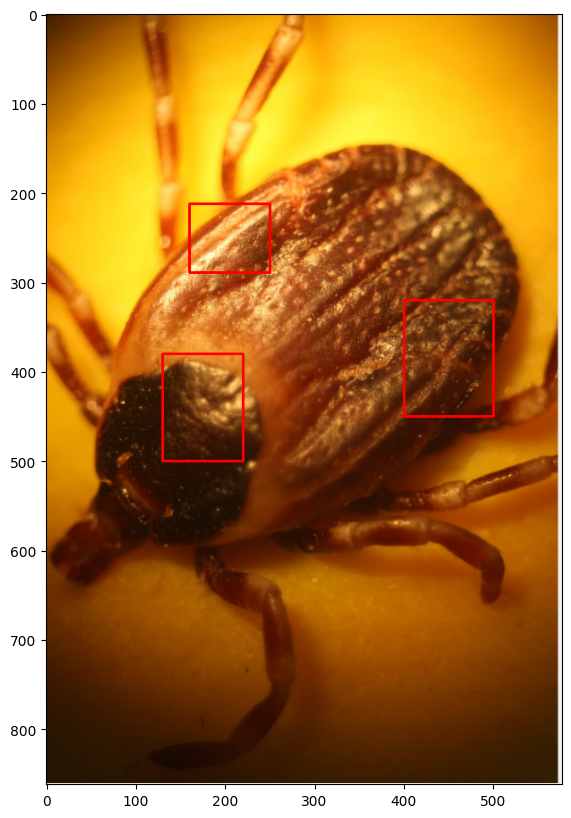

In [8]:
image = cv2.imread("/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/femelle/C102.PNG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color = (255), thickness=2)

cv2.rectangle(image, pt1=(130, 380), pt2=(220, 500), color = (255), thickness=2)

cv2.rectangle(image, pt1=(400, 320), pt2=(500, 450), color = (255), thickness=2)

plt.figure(figsize = (10,10))
plt.imshow(image, cmap="gray")
plt.show()

#Taille

In [10]:
image.shape

(862, 577, 3)

# type

In [11]:
image.dtype

dtype('uint8')



# **Visualisation**

# Vue globale

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

def load_images_from_folder(folder, num_images=100):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
            if len(images) >= num_images:
                break
    return images

def display_images(images):
    num_images = len(images)
    cols = 10 # Number of columns for the grid display
    rows = num_images // cols + (num_images % cols > 0)  # Compute number of rows needed

    plt.figure(figsize=(20, 20))  # Adjust figure size as needed
    for i, img in enumerate(images):
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img_rgb)
        plt.axis('off')
    plt.show()

input_folder = '/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/male'
num_images_to_display = 100

images = load_images_from_folder(input_folder, num_images_to_display)
display_images(images)


Output hidden; open in https://colab.research.google.com to view.

# Quelque exemplaire:

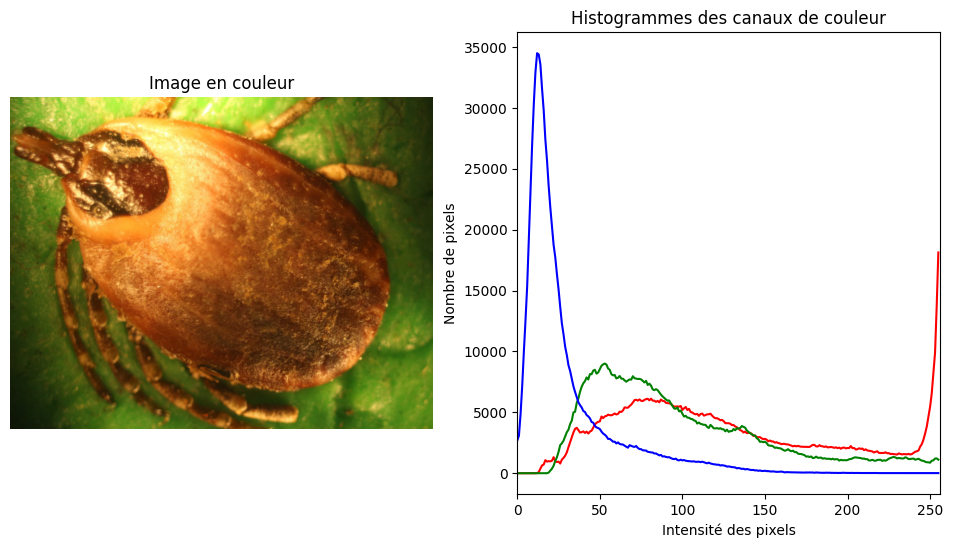

In [13]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image en couleur
image = cv2.imread('/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/femelle/229.PNG')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Calculer les histogrammes pour chaque canal de couleur
colors = ('r', 'g', 'b')
channels = cv2.split(image_rgb)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Image en couleur')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Histogrammes des canaux de couleur')
for channel, color in zip(channels, colors):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.xlabel('Intensité des pixels')
plt.ylabel('Nombre de pixels')

plt.show()


**⚾Les images dans notre base de données sont diversifiées et capturées par différents outils. Je vais donc présenter un exemplaire de chaque groupe.**


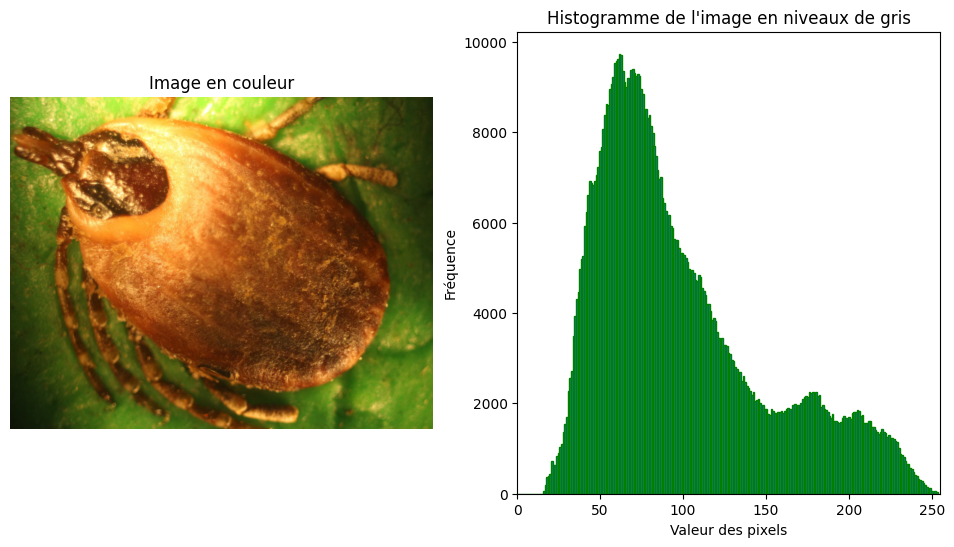

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image_path = '/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/femelle/229.PNG'
image = Image.open(image_path)
image_gray = image.convert('L')
image_array = np.array(image_gray)
histogram, bin_edges = np.histogram(image_array, bins=256, range=(0, 255))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Image en couleur')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)

plt.bar(bin_edges[:-1], histogram, width=1, edgecolor='green')
plt.title("Histogramme de l'image en niveaux de gris")
plt.xlabel("Valeur des pixels")
plt.ylabel("Fréquence")
plt.xlim(0, 255)
plt.show()

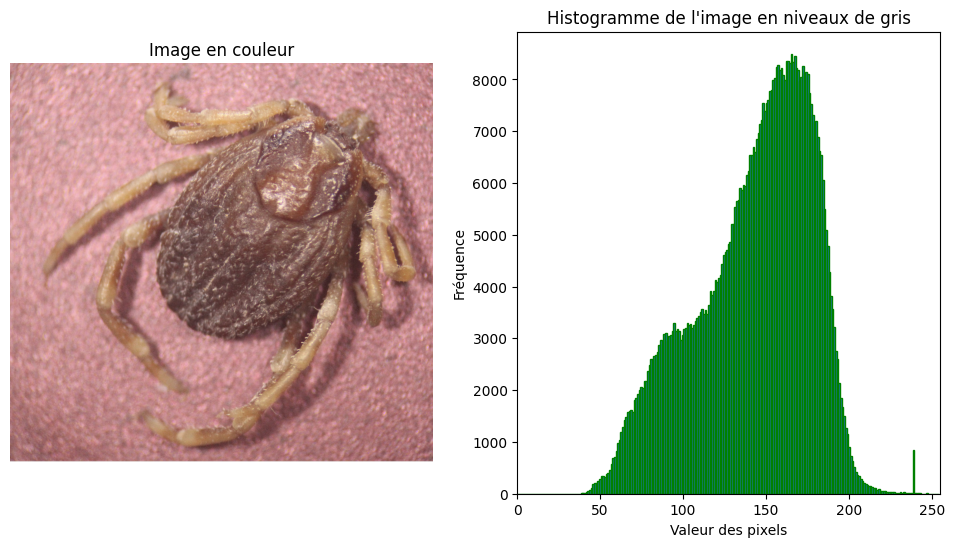

In [20]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image_path = '/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/femelle/C120.PNG'
image = Image.open(image_path)
image_gray = image.convert('L')
image_array = np.array(image_gray)
histogram, bin_edges = np.histogram(image_array, bins=256, range=(0, 255))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Image en couleur')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)

plt.bar(bin_edges[:-1], histogram, width=1, edgecolor='green')
plt.title("Histogramme de l'image en niveaux de gris")
plt.xlabel("Valeur des pixels")
plt.ylabel("Fréquence")
plt.xlim(0, 255)
plt.show()


**Choisir une autre image**

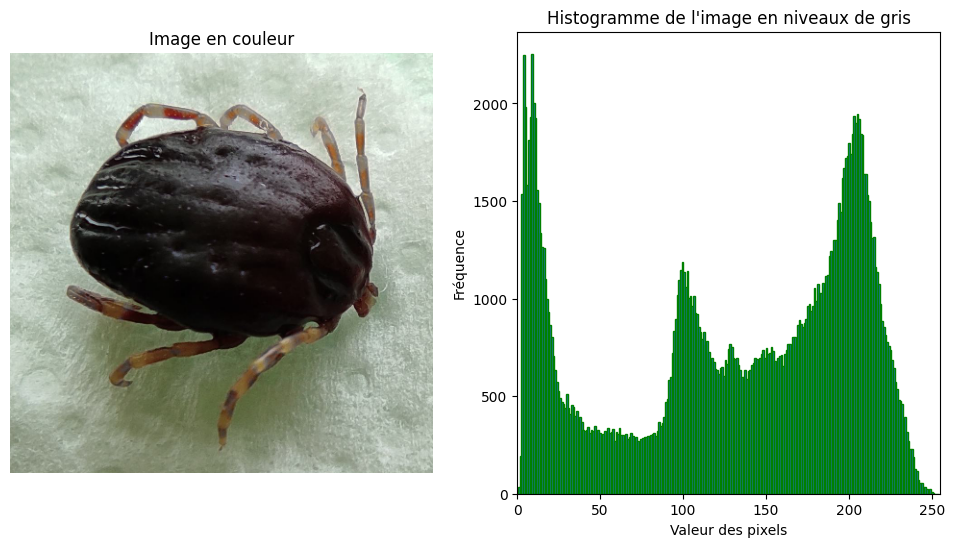

In [21]:
image_path = '/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/femelle/1C.PNG'
image = Image.open(image_path)
image_gray = image.convert('L')
image_array = np.array(image_gray)
histogram, bin_edges = np.histogram(image_array, bins=256, range=(0, 255))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Image en couleur')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)

plt.bar(bin_edges[:-1], histogram, width=1, edgecolor='green')
plt.title("Histogramme de l'image en niveaux de gris")
plt.xlabel("Valeur des pixels")
plt.ylabel("Fréquence")
plt.xlim(0, 255)
plt.show()


**Choisir une autre image**

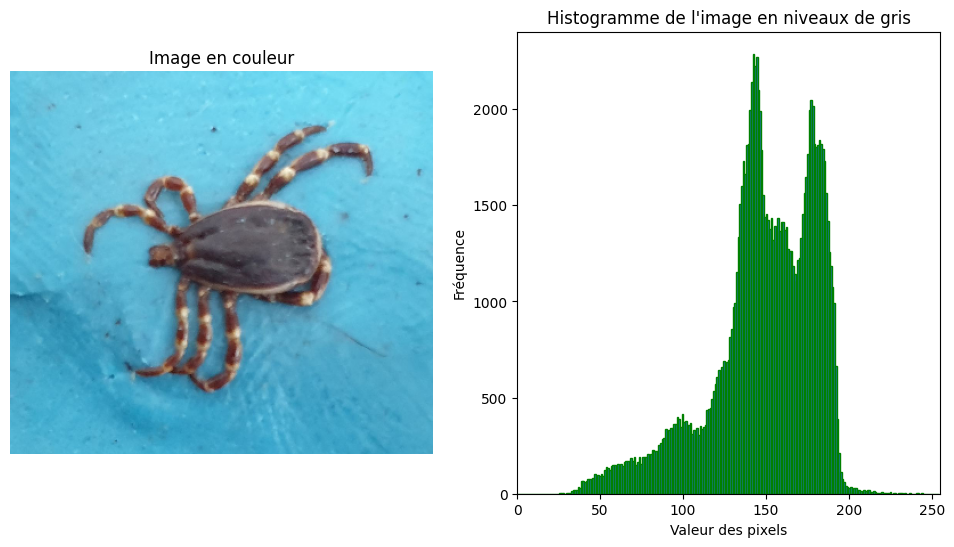

In [22]:
image_path = '/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/male/Q98.PNG'
image = Image.open(image_path)
image_gray = image.convert('L')
image_array = np.array(image_gray)
histogram, bin_edges = np.histogram(image_array, bins=256, range=(0, 255))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Image en couleur')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)

plt.bar(bin_edges[:-1], histogram, width=1, edgecolor='green')
plt.title("Histogramme de l'image en niveaux de gris")
plt.xlabel("Valeur des pixels")
plt.ylabel("Fréquence")
plt.xlim(0, 255)
plt.show()

**Choisir une autre image**

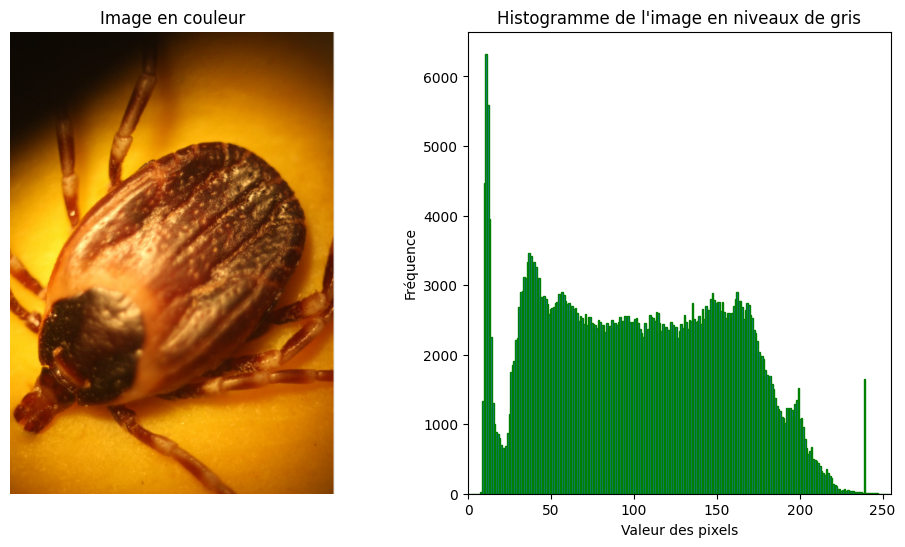

In [23]:

image_path = '/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/femelle/C99.PNG'
image = Image.open(image_path)
image_gray = image.convert('L')
image_array = np.array(image_gray)
histogram, bin_edges = np.histogram(image_array, bins=256, range=(0, 255))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Image en couleur')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)

plt.bar(bin_edges[:-1], histogram, width=1, edgecolor='green')
plt.title("Histogramme de l'image en niveaux de gris")
plt.xlabel("Valeur des pixels")
plt.ylabel("Fréquence")
plt.xlim(0, 255)
plt.show()

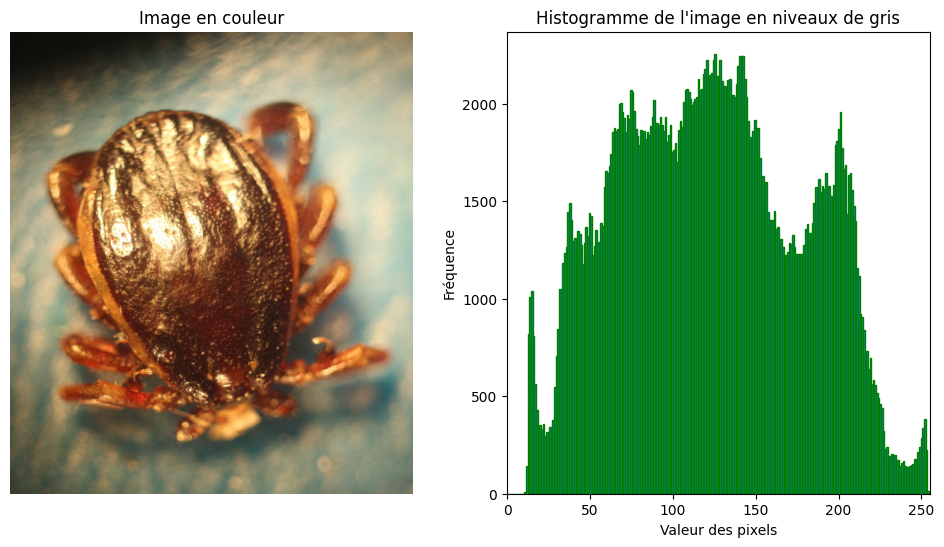

In [24]:
image_path = '/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/male/Q242.PNG'
image = Image.open(image_path)
image_gray = image.convert('L')
image_array = np.array(image_gray)
histogram, bin_edges = np.histogram(image_array, bins=256, range=(0, 255))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Image en couleur')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)

plt.bar(bin_edges[:-1], histogram, width=1, edgecolor='green')
plt.title("Histogramme de l'image en niveaux de gris")
plt.xlabel("Valeur des pixels")
plt.ylabel("Fréquence")
plt.xlim(0, 255)
plt.show()

# Nombre d'images


In [3]:
def count_images_in_directory(directory):
  num_images = 0
  for filename in os.listdir(directory):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp','.JPG','PNG')):
       num_images += 1

  return num_images

In [5]:
male='/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/male'
m=count_images_in_directory(male)
m


739

In [6]:
femelle='/content/drive/Shareddrives/PFE_TIQUE/Base/Croped_image_male_femelle/femelle'
f=count_images_in_directory(femelle)
f

488

In [7]:
import plotly.graph_objects as go

labels = ["male", "femelle"]
values = [m, f]
colors = ["gold", "mediumturquoise"]

fig = go.Figure(
    data=[
        go.Pie(
            labels=labels,
            values=values,
            textfont_size=20,
            marker=dict(colors=colors, pattern=dict(shape=[".", "x"]))
        )
    ]
)

fig.show()